In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('GOOG.csv', parse_dates=['Date'])

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [5]:
df = data.filter(['Date','Close'])

In [6]:
df.head()

,Date,Close
0,2004-08-19,49.982655
1,2004-08-20,53.952770
2,2004-08-23,54.495735
3,2004-08-24,52.239193
4,2004-08-25,52.802086


In [7]:
train = df[df.Date < '2018-06-01']

In [8]:
test = df[df.Date >='2018-06-01']

In [9]:
train.tail()

,Date,Close
3465,2018-05-24,1079.239990
3466,2018-05-25,1075.660034
3467,2018-05-29,1060.319946
3468,2018-05-30,1067.800049
3469,2018-05-31,1084.989990


In [10]:
test.head()

,Date,Close
3470,2018-06-01,1119.500000
3471,2018-06-04,1139.290039
3472,2018-06-05,1139.660034
3473,2018-06-06,1136.880005
3474,2018-06-07,1123.859985


In [11]:
train_set = train.drop(['Date'], axis=1)

In [12]:
test_set = test.drop(['Date'], axis=1)

In [13]:
scaler = MinMaxScaler()

In [14]:
train_set = scaler.fit_transform(train_set)

In [15]:
train_set

array([[1.45989194e-04],
       [3.67177827e-03],
       [4.15397590e-03],
       ...,
       [8.97408709e-01],
       [9.04051656e-01],
       [9.19317739e-01]])

In [16]:
x_train = []
y_train = []

In [17]:
for i in range(60, len(train_set)):
    x_train.append(train_set[i-60:i,0])
    y_train.append(train_set[i,0])

In [18]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape, y_train.shape

((3410, 60), (3410,))

In [20]:
x_train = np.reshape(x_train, (3410, 60, 1))

In [21]:
x_train.shape

(3410, 60, 1)

# Model LSTM

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=100,return_sequences=True , input_shape = (60,1)))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.LSTM(units=80, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.LSTM(units=60, return_sequences=False))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=50))
model.add(keras.layers.Dense(units=30))
model.add(keras.layers.Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 80)            57920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                33840     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3

In [24]:
model.compile(loss = 'mae', optimizer = 'adam')

In [25]:
model_hist = model.fit(x_train,y_train,validation_split = 0.2, epochs = 3, batch_size =32)

Train on 2728 samples, validate on 682 samples
Epoch 1/3
2728/2728 [==============================] - 219s 80ms/sample - loss: 0.0309 - val_loss: 0.0414
Epoch 2/3
2728/2728 [==============================] - 166s 61ms/sample - loss: 0.0142 - val_loss: 0.0191
Epoch 3/3
2728/2728 [==============================] - 164s 60ms/sample - loss: 0.0130 - val_loss: 0.0216


<AxesSubplot:>

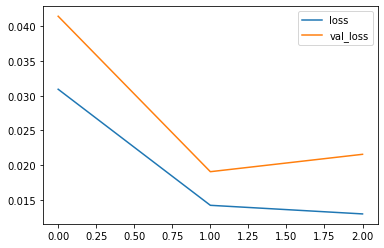

In [26]:
pd.DataFrame(model_hist.history).plot()

In [27]:
model.save('LSTM.h5')

In [28]:
test_set = scaler.fit_transform(test_set)

In [29]:
test_set

array([[0.25335978],
       [0.28835419],
       [0.28900845],
       [0.28409257],
       [0.26106947],
       [0.25578232],
       [0.27190906],
       [0.28840708],
       [0.28039691],
       [0.3110412 ],
       [0.31128878],
       [0.34877632],
       [0.33922776],
       [0.34237514],
       [0.32083756],
       [0.31698261],
       [0.26274947],
       [0.2515207 ],
       [0.22591598],
       [0.24402319],
       [0.24655193],
       [0.26743525],
       [0.22398861],
       [0.26179453],
       [0.28991029],
       [0.31445408],
       [0.31231431],
       [0.31418879],
       [0.36649456],
       [0.37593713],
       [0.36716651],
       [0.39358479],
       [0.38842132],
       [0.37264815],
       [0.3690233 ],
       [0.40543221],
       [0.48072566],
       [0.50834625],
       [0.51653341],
       [0.46378558],
       [0.43061255],
       [0.42622724],
       [0.43109002],
       [0.44194731],
       [0.43763259],
       [0.43950707],
       [0.47036354],
       [0.476

In [30]:
x_test = []
y_test = []

In [31]:
for i in range(60, len(test_set)):
    x_test.append(test_set[i-60:i,0])
    y_test.append(test_set[i,0])

In [32]:
x_test,y_test = np.array(x_test), np.array(y_test)

In [33]:
x_test.shape, y_test.shape

((472, 60), (472,))

In [34]:
x_test = np.reshape(x_test,(472,60,1))

In [35]:
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

In [36]:
scale = scaler.scale_

In [37]:
scale

array([0.00176828])

In [38]:
scale = 1/0.00176828
scale

565.5212975320651

In [39]:
y_test  =  y_test*scale

In [40]:
predicted_price

array([[1217.9832],
       [1216.0457],
       [1215.205 ],
       [1215.681 ],
       [1217.1841],
       [1218.9839],
       [1220.2257],
       [1220.3364],
       [1218.8969],
       [1215.8209],
       [1211.3561],
       [1206.1577],
       [1200.4713],
       [1194.8445],
       [1189.5947],
       [1184.6067],
       [1179.9847],
       [1176.0109],
       [1173.1208],
       [1171.0312],
       [1169.6737],
       [1169.1583],
       [1169.3517],
       [1170.3639],
       [1172.0927],
       [1174.3909],
       [1177.1552],
       [1180.2705],
       [1182.8872],
       [1184.392 ],
       [1184.444 ],
       [1182.8811],
       [1178.7594],
       [1172.0197],
       [1163.7258],
       [1154.4396],
       [1145.3225],
       [1136.998 ],
       [1129.2914],
       [1122.3385],
       [1116.3252],
       [1111.3801],
       [1106.4932],
       [1102.1077],
       [1098.002 ],
       [1093.1195],
       [1087.4429],
       [1081.9653],
       [1077.1442],
       [1072.9799],


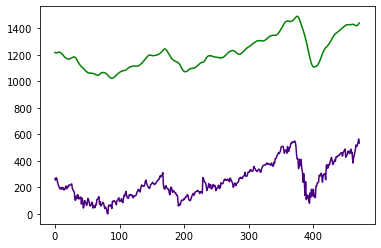

In [41]:
plt.plot(predicted_price, color = 'green', label = 'Predicted price')
plt.plot(y_test, color = 'indigo', label = 'Actaul close price')